In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import sklearn
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
location="Kickstartercombo.csv"

In [36]:
df=pd.read_csv(location)
df.head()

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
0,0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN
1,1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN
2,2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN
3,3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,canceled,19500.0,1283.0,USD,2015-07-04 08:35:00,2015-08-29 01:00:00,14,1283.0,NaN,NaN
4,4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN


In [37]:
df['state']=df['state'].dropna()

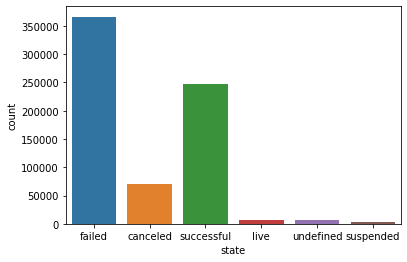

In [38]:
sns.countplot(x='state',data=df)

In [39]:
df=df.drop(['name','launched','backers', 'deadline'],axis=1)

In [40]:
df=df.drop(['ID', 'currency', 'usd_goal_real','usd_pledged_real'],axis=1)

In [41]:
df.count()

Unnamed: 0       702411
main_category    702411
category         702411
country          702411
state            702411
goal             702411
pledged          702411
usd pledged      694817
dtype: int64

In [42]:
df=df.drop('usd pledged',axis=1)

In [43]:
df.head()

,Unnamed: 0,main_category,category,country,state,goal,pledged
0,0,Publishing,Poetry,GB,failed,1000.0,0.0
1,1,Film & Video,Narrative Film,US,failed,45000.0,220.0
2,2,Music,Music,US,failed,5000.0,1.0
3,3,Film & Video,Film & Video,US,canceled,19500.0,1283.0
4,4,Food,Restaurants,US,successful,50000.0,52375.0


In [44]:
df.count()

Unnamed: 0       702411
main_category    702411
category         702411
country          702411
state            702411
goal             702411
pledged          702411
dtype: int64

In [45]:
df['Success']=np.where((df['state']=='successful'),1,0)

In [46]:
df.head()

,Unnamed: 0,main_category,category,country,state,goal,pledged,Success
0,0,Publishing,Poetry,GB,failed,1000.0,0.0,0
1,1,Film & Video,Narrative Film,US,failed,45000.0,220.0,0
2,2,Music,Music,US,failed,5000.0,1.0,0
3,3,Film & Video,Film & Video,US,canceled,19500.0,1283.0,0
4,4,Food,Restaurants,US,successful,50000.0,52375.0,1


In [47]:
df=df.drop(['country'],axis=1)

In [48]:
df=df.drop(['goal'],axis=1)

In [49]:
df.head()

,Unnamed: 0,main_category,category,state,pledged,Success
0,0,Publishing,Poetry,failed,0.0,0
1,1,Film & Video,Narrative Film,failed,220.0,0
2,2,Music,Music,failed,1.0,0
3,3,Film & Video,Film & Video,canceled,1283.0,0
4,4,Food,Restaurants,successful,52375.0,1


In [50]:
df=pd.get_dummies(data=df,columns=['main_category'])

In [51]:
df.head()

,Unnamed: 0,category,state,pledged,Success,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,...,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Graphic Novels,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
0,0,Poetry,failed,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,Narrative Film,failed,220.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,Music,failed,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,Film & Video,canceled,1283.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,Restaurants,successful,52375.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [52]:
df=df.drop(['category'],axis=1)

In [53]:
df=df.drop(['state'],axis=1)

In [70]:
y=df['pledged']

In [71]:
X=df.drop(['pledged'],axis=1)

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [80]:
LinReg=LinearRegression(fit_intercept=False)

In [81]:
LinReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [82]:
LinReg.score(X_train,y_train)

0.022890600650633752

In [83]:
print('Estimated intercept coefficient:',LinReg.intercept_)

Estimated intercept coefficient: 0.0


In [84]:
print('Number of coefficients:',len(LinReg.coef_))

Number of coefficients: 18


In [85]:
LinReg.predict(X)[0:5]

array([-3752.98600664, -2575.12118754, -7019.81144422, -2575.1195755 ,
       22067.48487567])

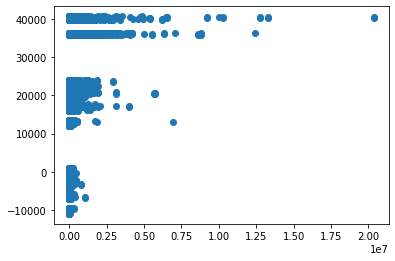

In [86]:
plt.scatter(y,LinReg.predict(X))

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
LogReg=LogisticRegression()

In [90]:
y=df['Success']

In [92]:
df.head()

,Unnamed: 0,pledged,Success,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Graphic Novels,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,220.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,1283.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,4,52375.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [93]:
X2=df.drop(['Success'],axis=1)

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.2, random_state=15)

In [95]:
LogReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
LogReg.score(X_train,y_train)

0.7562961802935607

In [103]:
y_pred=LogReg.predict(X_test)

In [104]:
cm=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted Fail','Predicted Success'],index=['True Fail','True Success'])

In [105]:
cm

,Predicted Fail,Predicted Success
True Fail,84287,6739
True Success,27390,22067


In [106]:
from sklearn.cluster import KMeans

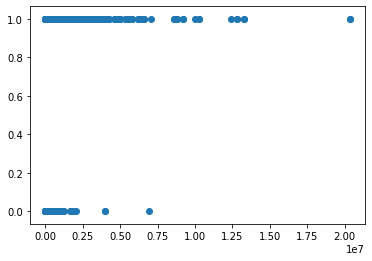

In [107]:
plt.scatter(df['pledged'],df['Success'])